# (SVC) Support Vector Classification

## Data preprocessing

✔️ Import the necessary libraries.

✔️ Load dataset (Position_Salaries.csv).

❌ Our dataset doesn't have any missing so, we can skip that step.

❌ We have categorical string data, but they are already label in another column called Level so, we can skip that step as well.

✔️ We only have 400 data. So, we can split and have an 75% training set and 25% test.

✔️ Logistic regression is more like equation type, but when we apply feature scaling for the dataset it will improve the performance of the model.

In [1]:
# Import libraries....
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# setting two digits after decimal point...
np.set_printoptions(precision=2)

In [2]:
# Load dataset...
dataset = pd.read_csv(r"../dataset/Social_Network_Ads.csv")
X = dataset.iloc[:, :-1].values # [row, column]
y = dataset.iloc[:, -1].values

In [3]:
# Split testing and training dataset...
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [4]:
# Performing feature scaling for the independent variable...
# Dependent variable y is already having 0's & 1's...
from sklearn.preprocessing import StandardScaler
x_sc = StandardScaler()
X_train = x_sc.fit_transform(X_train)
X_test = x_sc.transform(X_test)

## Train K-NN Model
- We are using scikit-learn's [sklearn.svm.SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html?#sklearn-svm-svc) module.

In [5]:
from sklearn.svm import SVC
# we have selected linear kernal to see the linear classification between the category.
# please do try changing the kernal by researching the sklearn's documentation. 
# we will see kernal svc model in next branch
svc_calssifier = SVC(kernel="linear", random_state=0)
svc_calssifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

## Predict New Value

In [6]:
print("Y Prediction : ", svc_calssifier.predict(x_sc.transform([[35,20000]])))

Y Prediction :  [0]


## Test K-NN Model

In [7]:
y_pred = svc_calssifier.predict(X_test)
print("Comparison of y_pred & y_test", np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1), sep='\n')

Comparison of y_pred & y_test
[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]]


## Create Confusion Matrix 

In [8]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
print("Confusion Matrix : ")
print(matrix)

# Detail view of matrix
print("Detail view of matrix : ")
NO_OF_CATEGORY = len(set(y_test))
for i in range(NO_OF_CATEGORY):
    for j in range(NO_OF_CATEGORY):
        print(f"Expect {j}", f"Predict {i}", ":", matrix[i][j])

Confusion Matrix : 
[[66  2]
 [ 8 24]]
Detail view of matrix : 
Expect 0 Predict 0 : 66
Expect 1 Predict 0 : 2
Expect 0 Predict 1 : 8
Expect 1 Predict 1 : 24


## Classification Accuracy Score

In [9]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_true=y_test, y_pred=y_pred))

0.9


## Classification Report

In [10]:
from sklearn.metrics import classification_report
print(classification_report(y_true=y_test, y_pred=y_pred, target_names=['Age', 'Estimated Salary']))

                  precision    recall  f1-score   support

             Age       0.89      0.97      0.93        68
Estimated Salary       0.92      0.75      0.83        32

        accuracy                           0.90       100
       macro avg       0.91      0.86      0.88       100
    weighted avg       0.90      0.90      0.90       100



## Visualising Train Set Result

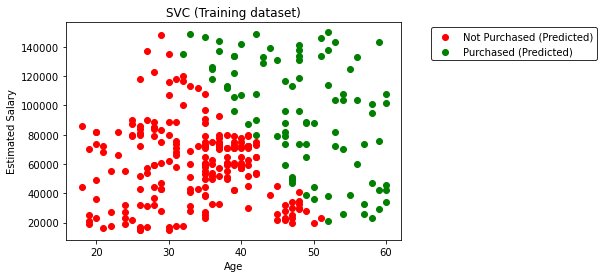

In [11]:
for i in zip(x_sc.inverse_transform(X_train), y_train):
    X = i[0]
    y = i[1]
    y_pred = svc_calssifier.predict(x_sc.transform([X]))
    plt.scatter(
        x=X[0],
        y=X[1], 
        color=('red', 'green')[y_pred[0]], 
        label=('Not Purchased (Predicted)', 'Purchased (Predicted)')[y_pred[0]]
    )
plt.title("SVC (Training dataset)")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")

handles, labels = plt.gca().get_legend_handles_labels()
label_dict = dict(zip(labels, handles))
by_label = {key:label_dict[key] for key in sorted(label_dict)}
plt.legend(by_label.values(), by_label.keys(), loc='upper right', edgecolor="black", bbox_to_anchor=(1.6, 1))
plt.show()

## Visualising Test Set Result

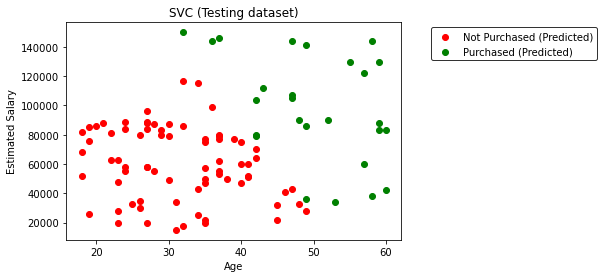

In [12]:
for i in zip(x_sc.inverse_transform(X_test), y_test):
    X = i[0]
    y = i[1]
    y_pred = svc_calssifier.predict(x_sc.transform([X]))
    plt.scatter(
        x=X[0],
        y=X[1], 
        color=('red', 'green')[y_pred[0]], 
        label=('Not Purchased (Predicted)', 'Purchased (Predicted)')[y_pred[0]]
    )
plt.title("SVC (Testing dataset)")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")

handles, labels = plt.gca().get_legend_handles_labels()
label_dict = dict(zip(labels, handles))
by_label = {key:label_dict[key] for key in sorted(label_dict)}
plt.legend(by_label.values(), by_label.keys(), loc='upper right', edgecolor="black", bbox_to_anchor=(1.6, 1))
plt.show()